# Code for Perceptron

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Write the Perceptron classifier

In [11]:
class Perceptron(object):
    """Perceptron classfier
    Parameters
    ---------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    
    Arributes
    ---------------
    w_: 1d-array
        Weights after fitting
    errors_: list
        Number of misclassfications in every epoch
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
    
    
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ------------
        X: {array-like}, shape = [n_sampels, n_features]
            Traning vectors, where n_samples is the number
            of samples and n_features is the number of features
        
        y: array-like, shape = [n_sampels]
            Target values
        
        Returns
        ------------
        self: object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        
        return self
    
    
    def net_input(self, X):
        """caculating the net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Load the data

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Preprocess the data
we extract the first 100 class labels that correspond to the 50 *Iris-Setosa* and 50 *Iris-Versicolor* flowers, respectively, and convert the class labels into the two integer class labels 1 (*Versicolor*) and -1 (*Setosa*) that we assign to a vector $y$ where the values method of a pandas DataFrame yields the corresponding NumPy representation. Similarly, we extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix $X$, which we can visualize via a two-dimensional scatter plot

In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

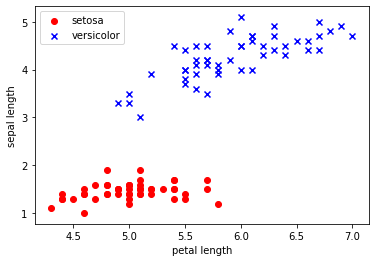

In [9]:
## visualize the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

## Train our model

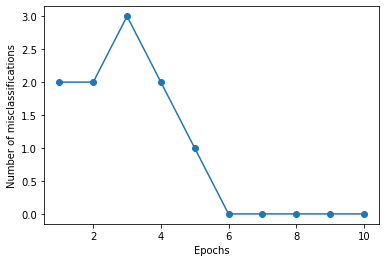

In [14]:
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## visualize the decision boundaries

In [33]:
def plot_decision_regions(X, y, classfier, resolution=0.01):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


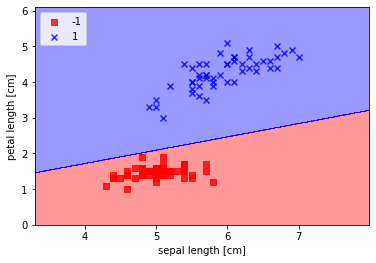

In [34]:
plot_decision_regions(X, y, classfier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive Linear Neuron

we will take the perceptron implementation that we defined earlier and change the fit method so that the weights are updated by minimizing the cost function via gradient descent:
$$
J(w)=\frac12 \sum_{i}\left(y^{(i)}-\phi(w^Tx^{(i)})\right)^2
$$


In [44]:
class AdalineGD(object):
    """Adaptive Linear Neuron classifier
    Parameters
    ---------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    
    Arributes
    ---------------
    w_: 1d-array
        Weights after fitting
    errors_: list
        Number of misclassfications in every epoch
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta;
        self.n_iter = n_iter;
        
    
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ------------
        X: {array-like}, shape = [n_sampels, n_features]
            Traning vectors, where n_samples is the number
            of samples and n_features is the number of features
        
        y: array-like, shape = [n_sampels]
            Target values
        
        Returns
        ------------
        self: object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * np.dot(X.T, errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    
    def net_input(self, X):
        """Calculate the net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, X):
        """Compute linear activations"""
        return self.net_input(X)
    
    
    def predict(self, X):
        """Return class label after each step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

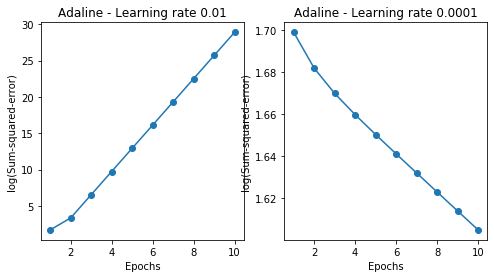

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada1 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

As we can see, if the learning rate is too large (left), the error becomes larger in every epoch because we overshoot the global minimum:

if the learning rate is too small(right), the algorithm would require a very large number of epochs to converge.

### Standardrization
We use the feature scaling to give our data the property of a standard normal distribution.
The mean of each feature is centered at value 0 and the feature column has a standard deviation of 1
$$
x_j=\frac{x_j-\mu_j}{\sigma_j}
$$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


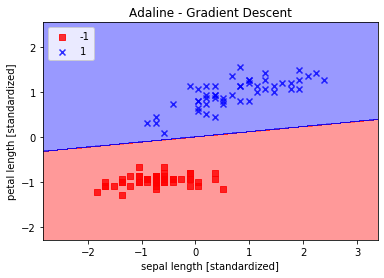

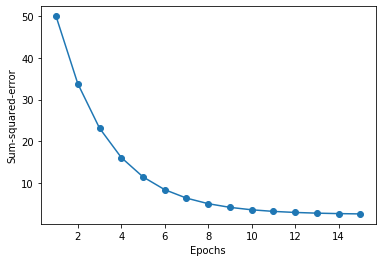

In [46]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classfier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## SGD
Advantage:
1. it typically reaches convergence much faster because of the more frequent weight updates.
2. Another advantage of stochastic gradient descent is that we can use it for online learning

In [47]:
from numpy.random import seed

In [52]:
class AdalineSGD(object):
    """Adaptive Linear Neuron classifier
    Parameters
    ---------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    
    Arributes
    ---------------
    w_: 1d-array
        Weights after fitting
    errors_: list
        Number of misclassfications in every epoch
    shuffle: bool(default True)
        shuffles training data every epoch
        if True to prevent cycles
    random_state: int (default:None)
        Set random state for shuffling
        and initializing the weights
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta;
        self.n_iter = n_iter;
        self.w_initialized = False;
        self.shuffle = shuffle;
        if random_state:
            seed(random_state)
        
    
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ------------
        X: {array-like}, shape = [n_sampels, n_features]
            Traning vectors, where n_samples is the number
            of samples and n_features is the number of features
        
        y: array-like, shape = [n_sampels]
            Target values
        
        Returns
        ------------
        self: object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights = np.zeros(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            sef._update_weights(X, y)
        
        return self
    
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    
    def _initialize_weights(self, m):
        """Initialize weights to all zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * np.dot(xi, error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        
        return cost
    
    def net_input(self, X):
        """Calculate the net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, X):
        """Compute linear activations"""
        return self.net_input(X)
    
    
    def predict(self, X):
        """Return class label after each step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


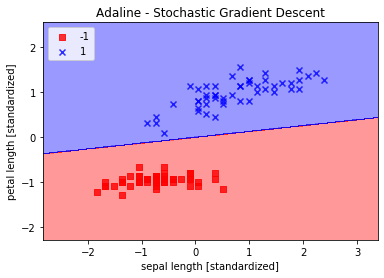

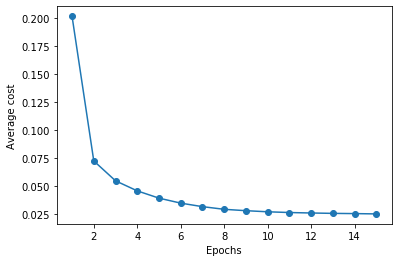

In [53]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classfier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.show()